# Algorithm Evaluation
Find out the model that works best for a given data

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 : Read train data

In [2]:
import pandas as pd 
df = pd.read_csv("train_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

### Step 3: Seperate X and Y(Survived)

In [6]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [9]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

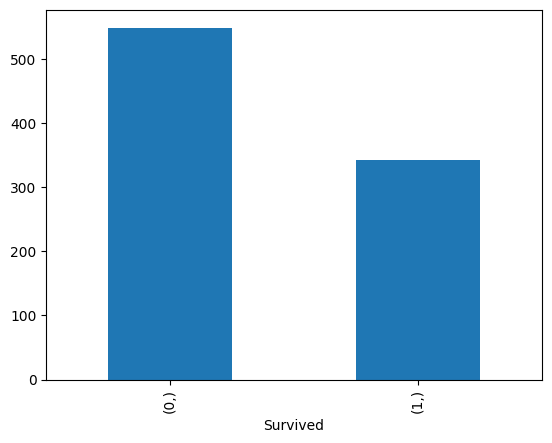

In [10]:
Y.value_counts().plot(kind='bar')

### Step 4: Preprocess the X data

In [14]:
# Seperate categorical and con data
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [15]:
cat

['Sex', 'Embarked']

In [16]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [13]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown="ignore",
                                                 sparse_output=False))])

In [17]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [18]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


### Step 5: Apply Train Test split

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [20]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
793,-1.566107,-0.104637,-0.474545,-0.473674,-0.030371,0.0,1.0,1.0,0.0,0.0
23,-1.566107,-0.104637,-0.474545,-0.473674,0.066360,0.0,1.0,0.0,0.0,1.0
97,-1.566107,-0.488887,-0.474545,0.767630,0.627278,0.0,1.0,1.0,0.0,0.0
9,-0.369365,-1.180535,0.432793,-0.473674,-0.042956,1.0,0.0,1.0,0.0,0.0
157,0.827377,0.049062,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [21]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [22]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
617,0.827377,-0.258337,0.432793,-0.473674,-0.324253,1.0,0.0,0.0,0.0,1.0
379,0.827377,-0.796286,-0.474545,-0.473674,-0.491874,0.0,1.0,0.0,0.0,1.0
725,0.827377,-0.719436,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
826,0.827377,-0.104637,-0.474545,-0.473674,0.489104,0.0,1.0,0.0,0.0,1.0
450,-0.369365,0.510161,0.432793,2.008933,-0.089684,0.0,1.0,0.0,0.0,1.0


In [23]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


In [24]:
xtrain.shape

(712, 10)

In [25]:
xtest.shape

(179, 10)

### Step 6: Algorithm evaluation
KNN and SVM should be used only when data is upto 1000 rows

In [26]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [28]:
dct = {
    "Logistic" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGBoost" : xgb.XGBClassifier(),
    "KNN" : KNeighborsClassifier(),
    "SVM" : SVC()
}

In [29]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('XGBoost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)), ('KNN', KNeighborsClassifier()), ('SVM',

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [31]:
# Initialize train, test and cv scores blank list
train = []
test = []
train_cv = []
# Apply for loop on the models
for name, model in dct.items():
    # Train the model
    model.fit(xtrain, ytrain)
    # Predict the results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Calculate f1 score for train and test
    train_f1 = f1_score(ytrain, ypred_train, average='macro')
    test_f1 = f1_score(ytest, ypred_test, average='macro')
    # Calculate 5 fold cv score for data
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    cv = float(scores.mean())
    # Append above values in the list
    train.append(train_f1)
    test.append(test_f1)
    train_cv.append(cv)
    # Print the results
    print(f"Model Name : {name}\n")
    print(f"Train F1 Macro : {train_f1:.4f}")
    print(f"Test F1 Macro : {test_f1:.4f}")
    print(f"Train 5 Fold CV F1 Macro : {cv:.4f} ")
    print("\n==================================================\n")

Model Name : Logistic

Train F1 Macro : 0.7876
Test F1 Macro : 0.7931
Train 5 Fold CV F1 Macro : 0.7820 


Model Name : Decision Tree

Train F1 Macro : 0.9834
Test F1 Macro : 0.7846
Train 5 Fold CV F1 Macro : 0.7591 


Model Name : Random Forest

Train F1 Macro : 0.9835
Test F1 Macro : 0.8060
Train 5 Fold CV F1 Macro : 0.7779 


Model Name : Gradient Boost

Train F1 Macro : 0.8943
Test F1 Macro : 0.8285
Train 5 Fold CV F1 Macro : 0.7899 


Model Name : XGBoost

Train F1 Macro : 0.9667
Test F1 Macro : 0.8420
Train 5 Fold CV F1 Macro : 0.7801 


Model Name : KNN

Train F1 Macro : 0.8400
Test F1 Macro : 0.8060
Train 5 Fold CV F1 Macro : 0.7695 


Model Name : SVM

Train F1 Macro : 0.8240
Test F1 Macro : 0.8265
Train 5 Fold CV F1 Macro : 0.8044 




### Create a dataframe and show results in tabular format

In [32]:
results = {
    'name' : list(dct.keys()),
    'train_f1' : train,
    'test_f1' : test,
    'train_cv' : train_cv
}

In [33]:
results_df = pd.DataFrame(results)
results_df

,name,train_f1,test_f1,train_cv
0,Logistic,0.787602,0.793077,0.781993
1,Decision Tree,0.983432,0.784583,0.759110
2,Random Forest,0.983483,0.805952,0.777858
3,Gradient Boost,0.894330,0.828550,0.789945
4,XGBoost,0.966678,0.842043,0.780104
5,KNN,0.840032,0.805952,0.769517
6,SVM,0.824030,0.826533,0.804357


In [34]:
results_df.sort_values(by='train_cv', ascending=False)

,name,train_f1,test_f1,train_cv
6,SVM,0.824030,0.826533,0.804357
3,Gradient Boost,0.894330,0.828550,0.789945
0,Logistic,0.787602,0.793077,0.781993
4,XGBoost,0.966678,0.842043,0.780104
2,Random Forest,0.983483,0.805952,0.777858
5,KNN,0.840032,0.805952,0.769517
1,Decision Tree,0.983432,0.784583,0.759110


### From above the SVM Model has best f1_macro Cross validated score of 0.8043

In [58]:
best_model = SVC(probability=True)
best_model.fit(xtrain, ytrain)

SVC(probability=True)

In [59]:
best_model.score(xtrain, ytrain)

0.8412921348314607

In [60]:
best_model.score(xtest, ytest)

0.8379888268156425

### Evaluating selected model

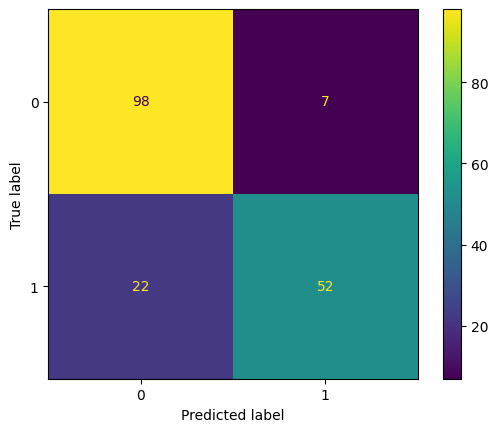

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)

In [62]:
# Predict results for train and test
ypred_train = best_model.predict(xtrain)
ypred_test = best_model.predict(xtest)

In [63]:
ypred_test[0:5]

array([0, 0, 0, 0, 0])

In [64]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


In [65]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       105
           1       0.88      0.70      0.78        74

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.83       179



### Plot ROC (Reciever Operator Characterestics) AUC (Area Under Curve)

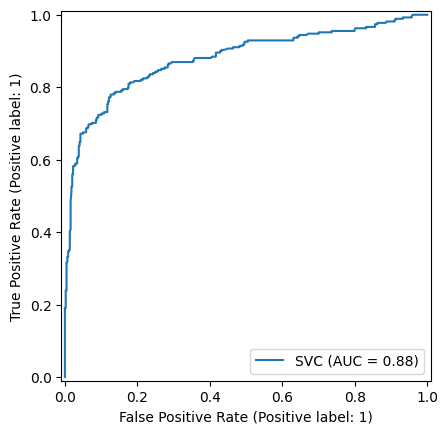

In [66]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model, xtrain, ytrain)

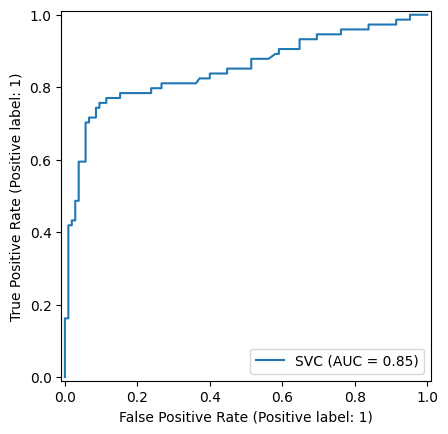

In [67]:
RocCurveDisplay.from_estimator(best_model, xtest, ytest)

In [68]:
roc_scores = cross_val_score(best_model, xtrain, ytrain, cv=5, scoring='roc_auc')
roc_scores

array([0.86371203, 0.83697462, 0.8501166 , 0.83739665, 0.84364478])

In [69]:
roc_scores.mean()

np.float64(0.8463689345579318)

### Because cross validated ROC AUC score for train is more than 0.8 hence model is good model

### Out of sample predictions

In [70]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [73]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


In [74]:
preds = best_model.predict(xnew_pre)
probs = best_model.predict_proba(xnew_pre)

In [75]:
preds[0:5]

array([0, 0, 0, 0, 0])

In [77]:
model.classes_

array([0, 1])

In [76]:
probs[0:5]

array([[0.83882515, 0.16117485],
       [0.57719762, 0.42280238],
       [0.86823326, 0.13176674],
       [0.85183765, 0.14816235],
       [0.53080246, 0.46919754]])

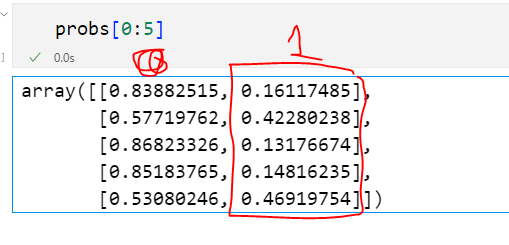

In [79]:
prob_sur = probs[:, 1]
prob_sur[0:5]

array([0.16117485, 0.42280238, 0.13176674, 0.14816235, 0.46919754])

In [83]:
df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [84]:
df_final['Survived_pred'] = preds 
df_final['Prob_survived'] = prob_sur

In [85]:
df_final

,PassengerId,Survived_pred,Prob_survived
0,892,0,0.161175
1,893,0,0.422802
2,894,0,0.131767
3,895,0,0.148162
4,896,0,0.469198
...,...,...,...
413,1305,0,0.148017
414,1306,1,0.886268
415,1307,0,0.157644
416,1308,0,0.148017


In [86]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    275
1    143
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

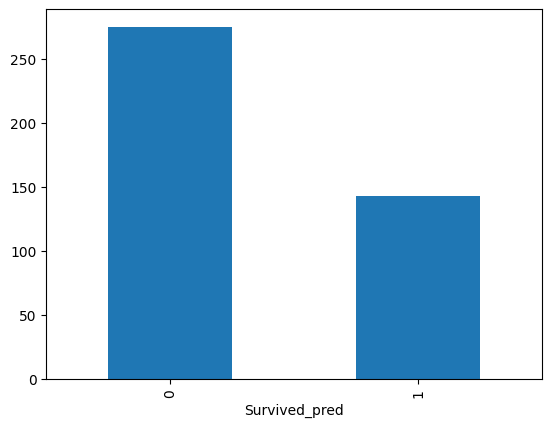

In [87]:
df_final['Survived_pred'].value_counts().plot(kind='bar')

In [88]:
df_final.to_csv("SVMResults.csv", index=False)